In [1]:
import sys
sys.path.append('../libml')
from summary_utils import summarize_noise_results

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
label_font_size = 22
title_font_size = 25
legend_font_size = 18
SIGMA = 1.
model_list = ['erm','mixup','l2_0.001','l2_0.002','l2_0.004','l2_0.008']
name_list=['ERM','Mixup','l2_0.001','l2_0.002','l2_0.004','l2_0.008']
color_list=['gray', 'red', 'skyblue', 'dodgerblue','blue', 'navy'] # darkslateblue

In [3]:
def show_noise_gap_plot(dataset='cifar10'):
    if dataset == 'cifar10':
        x_list = [2500,5000,25000,50000]
        ylim_data = -30
    elif dataset == 'cifar100':
        x_list = [2500,5000,25000,50000]
        ylim_data = -50
    else:
        assert False, "Please, check datasets"
        
    noise_list = [0.005, 0.01, 0.02]
    plt.figure(figsize=(25,8))    
    for ind, noise in enumerate(noise_list):
        plt.subplot(1,3,int(ind+1))
        df_data = summarize_noise_results(dataset=dataset, **{'mode':'s&p', 'p': noise})
        
        for i in range(len(color_list)):
            #test plot
            ymean = df_data['gap_test_mean'][df_data['model']==model_list[i]]
            yerr = df_data['gap_test_std'][df_data['model']==model_list[i]]
            plt.plot((x_list), ymean, '--', marker='o',
             color=color_list[i], label=name_list[i], alpha=0.75) 
            plt.fill_between((x_list), ymean-SIGMA*yerr, ymean+SIGMA*yerr,
             alpha=0.3, edgecolor=color_list[i], facecolor=color_list[i])
        
        if ind == 0:    
            plt.ylabel('Accuracy degradation (in %)', fontsize=label_font_size)
            plt.legend(loc='lower left', borderaxespad=0., fontsize=legend_font_size)
        if ind == 1:
            plt.xlabel("Sample size $n$", fontsize=label_font_size)
        plt.ylim(ylim_data,0)
        plt.title('Noise:{} %'.format(100*noise), fontsize=title_font_size)
    
    plt.savefig('figures/s-noise_gap_{}.pdf'.format(dataset), dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()


# Visualize degradation gap
## CIFAR-10

------------------------------
Salt and Pepper noise
------------------------------


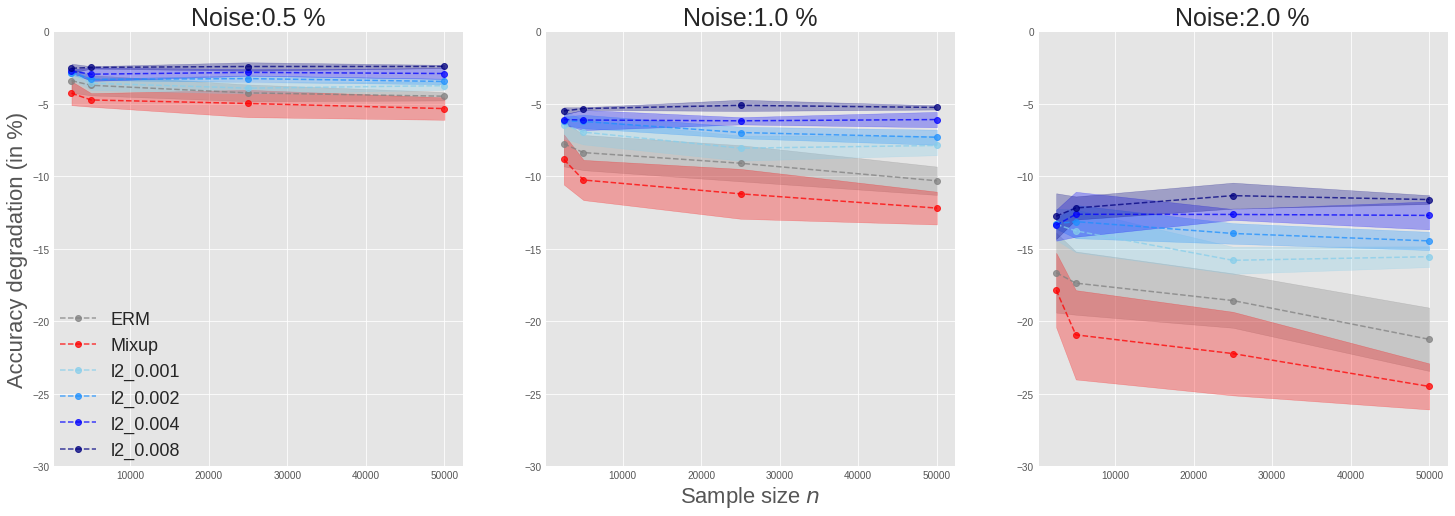

In [4]:
print('-'*30)
print('Salt and Pepper noise')
print('-'*30)
show_noise_gap_plot(dataset='cifar10')

## CIFAR-100

------------------------------
Salt and Pepper noise
------------------------------


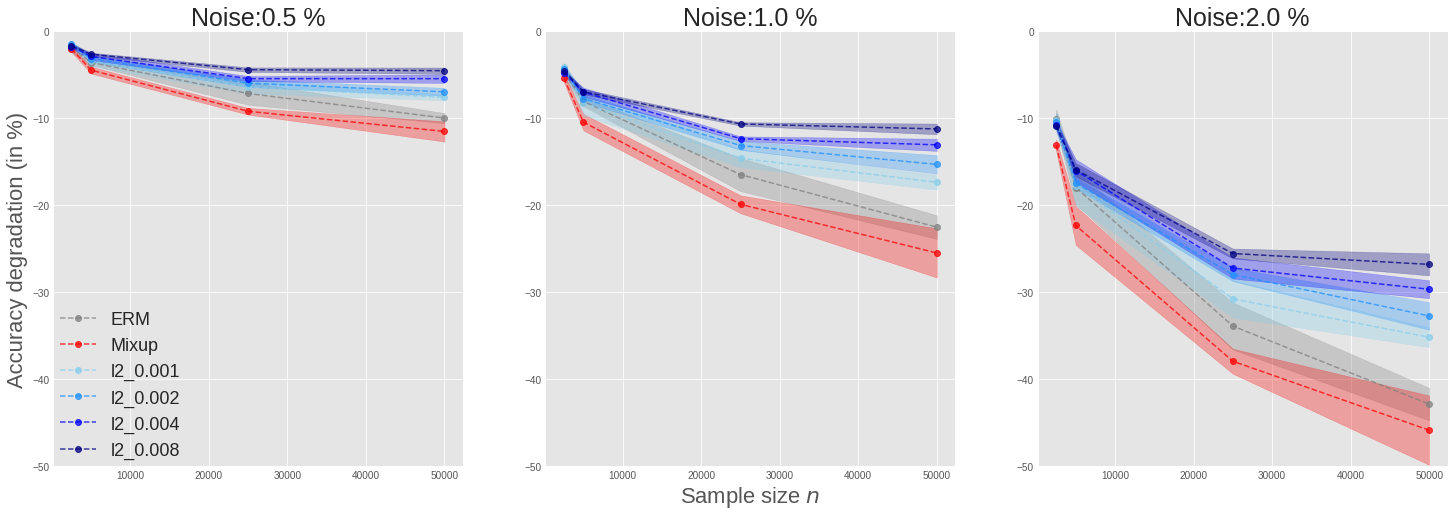

In [5]:
print('-'*30)
print('Salt and Pepper noise')
print('-'*30)
show_noise_gap_plot(dataset='cifar100')